# 1 cleaning data

In [1]:
rm(list=ls())
library(stringr)
setwd(paste0(strsplit(getwd(),split = "/code"), "/dataset"))
bodyfat=read.csv('BodyFat.csv')
head(as.matrix(bodyfat))
summary(bodyfat)

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


      IDNO           BODYFAT         DENSITY           AGE       
 Min.   :  1.00   Min.   : 0.00   Min.   :0.995   Min.   :22.00  
 1st Qu.: 63.75   1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75  
 Median :126.50   Median :19.00   Median :1.055   Median :43.00  
 Mean   :126.50   Mean   :18.94   Mean   :1.056   Mean   :44.88  
 3rd Qu.:189.25   3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00  
 Max.   :252.00   Max.   :45.10   Max.   :1.109   Max.   :81.00  
     WEIGHT          HEIGHT        ADIPOSITY          NECK      
 Min.   :118.5   Min.   :29.50   Min.   :18.10   Min.   :31.10  
 1st Qu.:159.0   1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40  
 Median :176.5   Median :70.00   Median :25.05   Median :38.00  
 Mean   :178.9   Mean   :70.15   Mean   :25.44   Mean   :37.99  
 3rd Qu.:197.0   3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42  
 Max.   :363.1   Max.   :77.75   Max.   :48.90   Max.   :51.20  
     CHEST           ABDOMEN            HIP            THIGH      
 Min.   : 79.30 

In [2]:
#boxplot(bodyfat)
library(ggplot2)

## 1.1 use siri equation to find outlier

In [3]:
which.min(bodyfat$DENSITY) #"The body fat density of this person is below 1"
which.min(bodyfat$BODYFAT) #"The body fat is zero of this person"

[1] 216

[1] 182

In [4]:
as.matrix(bodyfat[c(216,182),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
216,216,45.1,0.9950,51,219.0,64,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
182,182,0.0,1.1089,40,118.5,68,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


Plot Bodyfat~1/density beacause from the formula
$$ \text{Percentage of Body Fat} = \dfrac{495}{\text{Body Density}} - 450 $$
there should be a linear relationship between the Bodyfat and the inverse of the density

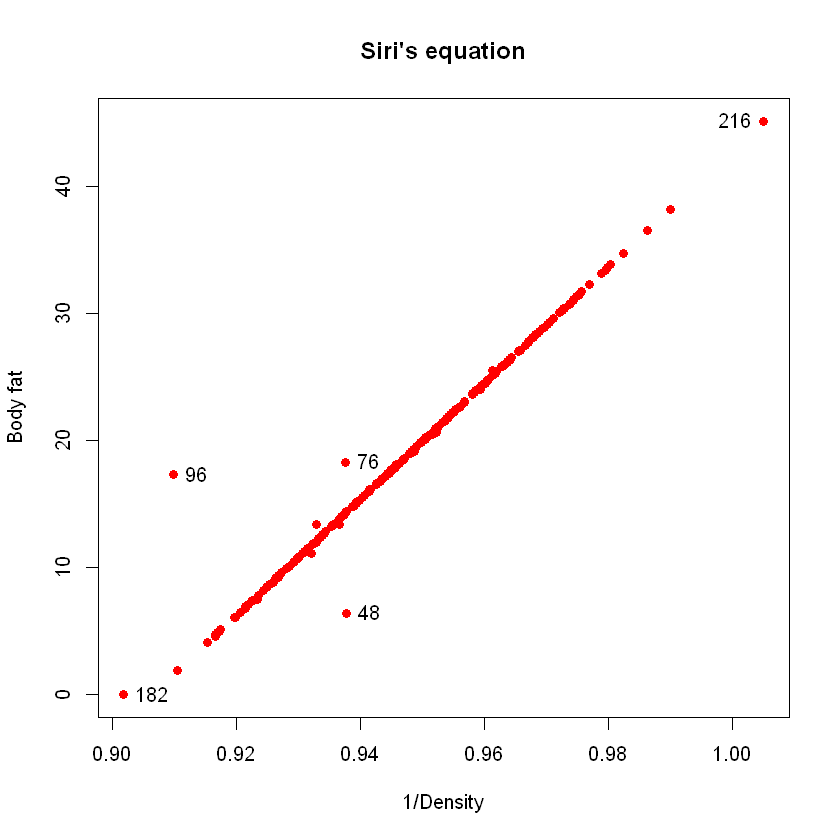

In [5]:
reverse.density=1/bodyfat$DENSITY
plot(bodyfat$BODYFAT ~ reverse.density,main="Siri's equation",xlab="1/Density",ylab="Body fat",pch=19,col="red")
text(reverse.density[c(96, 182 ,48 ,76)],bodyfat$BODYFAT[c(96, 182 ,48 ,76)] ,c(96, 182 ,48 ,76),p=4) 
text(reverse.density[216],bodyfat$BODYFAT[216],c(216),p = 2)#96 182 48 76 216

From the plot above ,there are some points need to check

In [6]:
as.matrix(bodyfat[c(48 ,76, 96, 182, 216 ),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
48,48,6.4,1.0665,39,148.50,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9
76,76,18.3,1.0666,61,148.25,67.50,22.9,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27.0,18.3
96,96,17.3,1.0991,53,224.50,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4
182,182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
216,216,45.1,0.9950,51,219.00,64.00,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


## 1.2 Check the outliers

####   48th entry

In [7]:
as.matrix(bodyfat[48,])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
48,48,6.4,1.0665,39,148.5,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9


for the 48 its bodyfat is 6.4, which is extreme lower than other person who has roughly same body indices, thus we can regard the bodyfat is acquired imprecise and use siri's equation to impute such value.

In [8]:
a=495/bodyfat$DENSITY[48]- 450
cat("the imputed bodyfat of 48 is", a)
bodyfat$BODYFAT[48]=a

the imputed bodyfat of 48 is 14.13502

#### 96th entry
At first we check the adjacent entries to find the abnormal component of 96th entry

In [9]:
as.matrix(bodyfat[c(96,97,98),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
96,96,17.3,1.0991,53,224.50,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4
97,97,10.1,1.0770,38,188.75,73.25,24.8,37.5,99.1,91.6,102.4,60.6,39.4,22.9,31.6,30.1,18.5
98,98,11.1,1.0730,50,162.50,66.50,25.9,38.7,99.4,86.7,96.2,62.1,39.3,23.3,30.6,27.8,18.2


we can find from 97 and 98,when density increasing ,the bodyfat should decrease. However, this time when density goes up the bodyfat goes up as well. 

if we use the density to impute the bodyfat, then it should be

In [10]:
495/bodyfat$DENSITY[96]- 450

[1] 0.3684833

which is impossible compare with the bodyfat with others, hence this time we use bodyfat to compute density

In [11]:
bodyfat$DENSITY[96]=495/(bodyfat$BODYFAT[96]+450)
as.matrix(bodyfat[96,])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
96,96,17.3,1.059277,53,224.5,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4


#### 182th entry

In [12]:
 as.matrix(bodyfat[c(182,183,184),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
182,182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
183,183,11.9,1.0725,40,145.75,67.25,22.7,35.5,95.5,83.6,91.6,54.1,36.2,21.8,31.4,28.3,17.2
184,184,12.4,1.0713,40,159.25,69.75,23.0,35.3,92.3,86.8,96.1,58.0,39.4,22.7,30.0,26.4,17.4


the bodyfat is 0 so we should use density to compute

In [13]:
495/bodyfat$DENSITY[182]- 450

[1] -3.611687

After applying siri's equation,the bodyfat is negative ,which is impossible. We should delete 182 since neither the bodyfat nor density  are correct.

#### 76th entry

In [14]:
as.matrix(bodyfat[c(75,76),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
75,75,12.0,1.0720,61,143.00,65.75,23.3,36.5,93.4,83.3,93.0,55.5,35.2,20.9,29.4,27,16.8
76,76,18.3,1.0666,61,148.25,67.50,22.9,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27,18.3


Comparing these two entries,we can see that the bodyfat has a large gap among those two while the bmi does not show much difference, as well as the other variables. We could assume that the bodyfat of 76 is incorrect and impute it from density.

In [15]:
bodyfat$BODYFAT[76]=495/bodyfat$DENSITY[76]- 450

### recheck from the plot of siri's equation

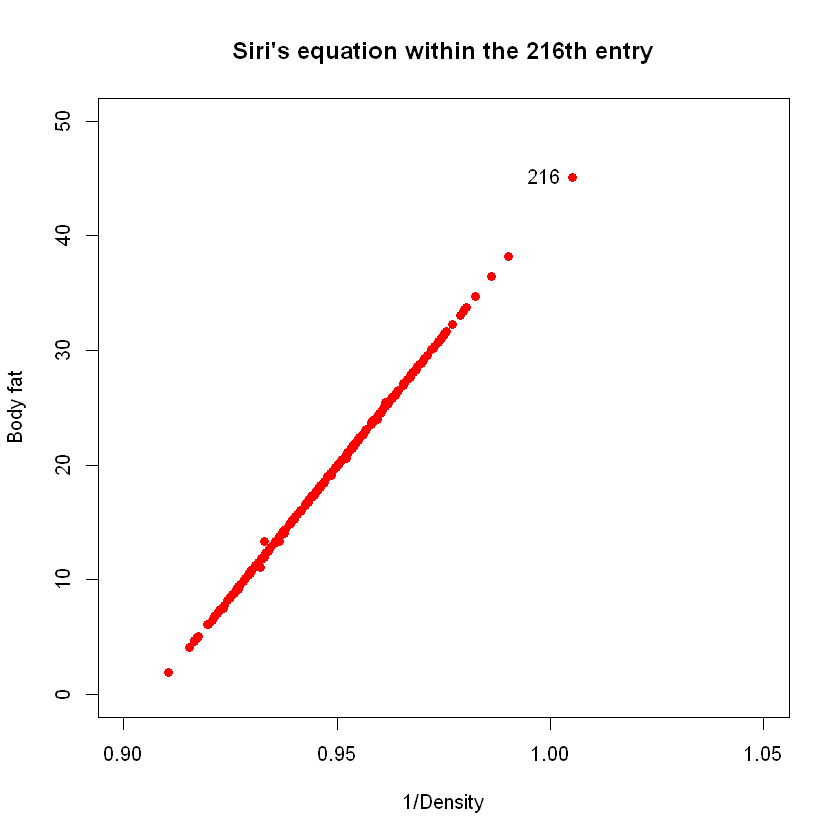

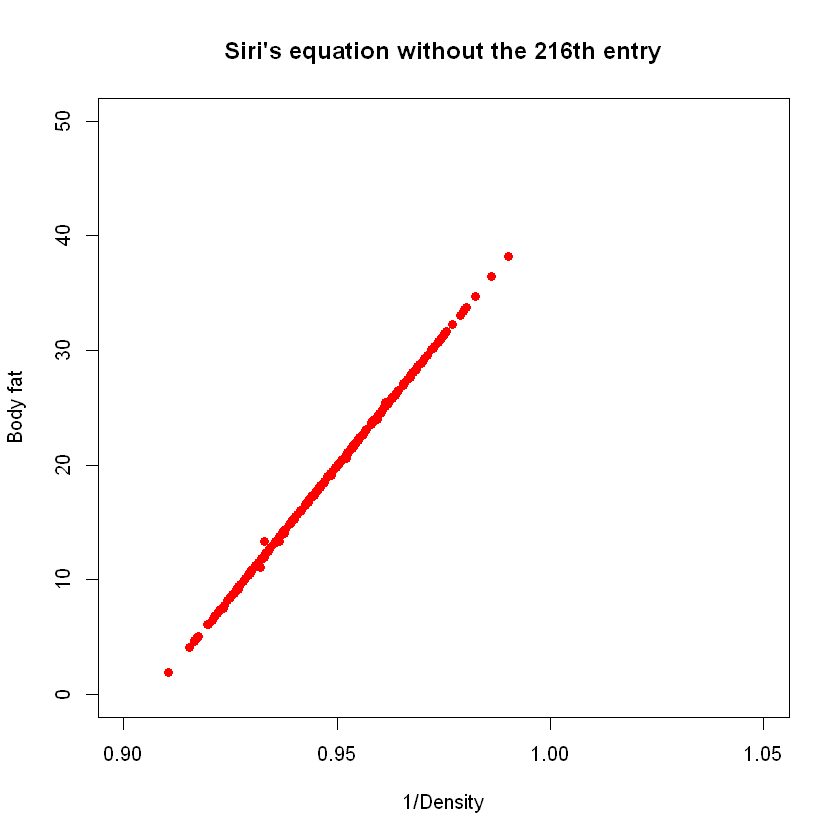

In [16]:
reverse.density=1/bodyfat$DENSITY
plot(bodyfat$BODYFAT[-c(182)] ~ reverse.density[-c(182)],
     main="Siri's equation within the 216th entry",xlab="1/Density",ylab="Body fat",pch=19,col="red",xlim=c(0.9,1.05),ylim=c(0,50))
text(reverse.density[216],bodyfat$BODYFAT[216] ,c(216),p=2)
plot(bodyfat$BODYFAT[-c(182,216)] ~ reverse.density[-c(182,216)],
     main="Siri's equation without the 216th entry",xlab="1/Density",ylab="Body fat",pch=19,col="red",xlim=c(0.9,1.05),ylim=c(0,50))

from above analysis,we know that 182 is the one we need to delete 

as for 216,it's 1/density and bodyfat is on the line,

hence the density is wrong and the bodyfat is computed by siri's equation

thus the 216 should also delete.

## 1.2 use BMI to find outliers 
$$bmi= {weight\over(height)^2}$$

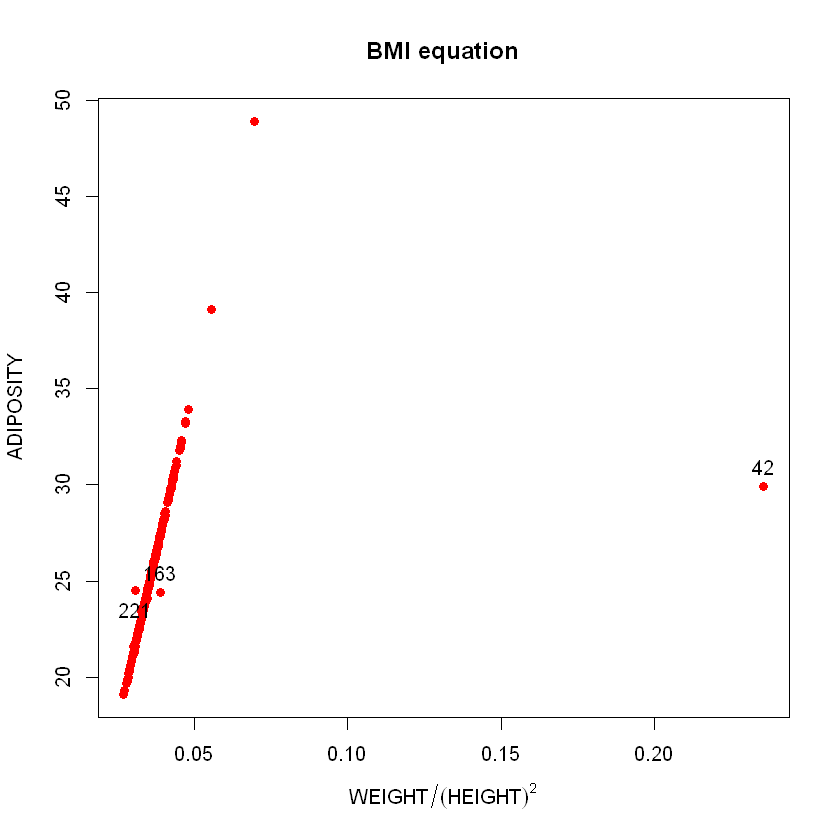

In [17]:
bmi=bodyfat$WEIGHT/(bodyfat$HEIGHT)^2
plot(bodyfat$ADIPOSITY[c(-182,-216)] ~ bmi[c(-182,-216)],main="BMI equation",xlab=expression(WEIGHT/(HEIGHT)^2),ylab="ADIPOSITY",pch=19,col="red")
text(bmi[c(42,163)],bodyfat$ADIPOSITY[c(42,163)]  ,c(42,163),p=3) #42,163,221
text(bmi[c(221)],bodyfat$ADIPOSITY[c(221)]  ,c(221),p=1) #42,163,221

In [18]:
as.matrix(bodyfat[c(42,163,221),])

#construct a model so that we can use bmi to compute ADIPOSITY
summary(model.bmi<-lm(bodyfat$ADIPOSITY[-c(42,163,221)]~bmi[-c(42,163,221)]))

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
42,42,31.7,1.0250,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
163,163,13.3,1.0690,33,184.25,68.75,24.4,40.7,98.9,92.1,103.5,64.0,37.3,23.5,33.5,30.6,19.7
221,221,12.7,1.0706,54,153.25,70.50,24.5,38.5,99.0,91.8,96.2,57.7,38.1,23.9,31.4,29.9,18.9



Call:
lm(formula = bodyfat$ADIPOSITY[-c(42, 163, 221)] ~ bmi[-c(42, 
    163, 221)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.278097 -0.022798 -0.001448  0.027690  0.266186 

Coefficients:
                       Estimate Std. Error  t value Pr(>|t|)    
(Intercept)             0.07035    0.02131    3.302   0.0011 ** 
bmi[-c(42, 163, 221)] 702.07386    0.58397 1202.234   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04791 on 247 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 1.445e+06 on 1 and 247 DF,  p-value: < 2.2e-16


then we have a linear model which is 
$$ADIPOSITY=0.07035+702.07386*bmi$$

###  Check outliers

#### 42th entry

In [19]:
as.matrix(bodyfat[c(41,42,43),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
41,41,33.1,1.0217,45,262.75,68.75,39.1,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
42,42,31.7,1.0250,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
43,43,30.4,1.0279,48,217.00,70.00,31.2,37.3,113.3,111.2,114.1,67.7,40.9,25.0,36.7,29.8,18.4


the heigth of the 42 is only 29.5 which might be mistake

In [20]:
cat("the plug-in bmi value of 42 is", sqrt(bodyfat$WEIGHT[42]/bodyfat$ADIPOSITY[42]))

the plug-in bmi value of 42 is 2.618432

Since the plug-in bmi is abnormal, we need to impute one factor based on the aproximated adiposity and above estimated equation.

In [21]:
bmi.42=(bodyfat$ADIPOSITY[42]-0.07035)/702.07386
print(height<-sqrt(bodyfat$WEIGHT[42]/bmi.42))

[1] 69.46152


hence the height of the 42 guy is 69.4615, which is much reliable

#### Recheck the BMI equation plot 

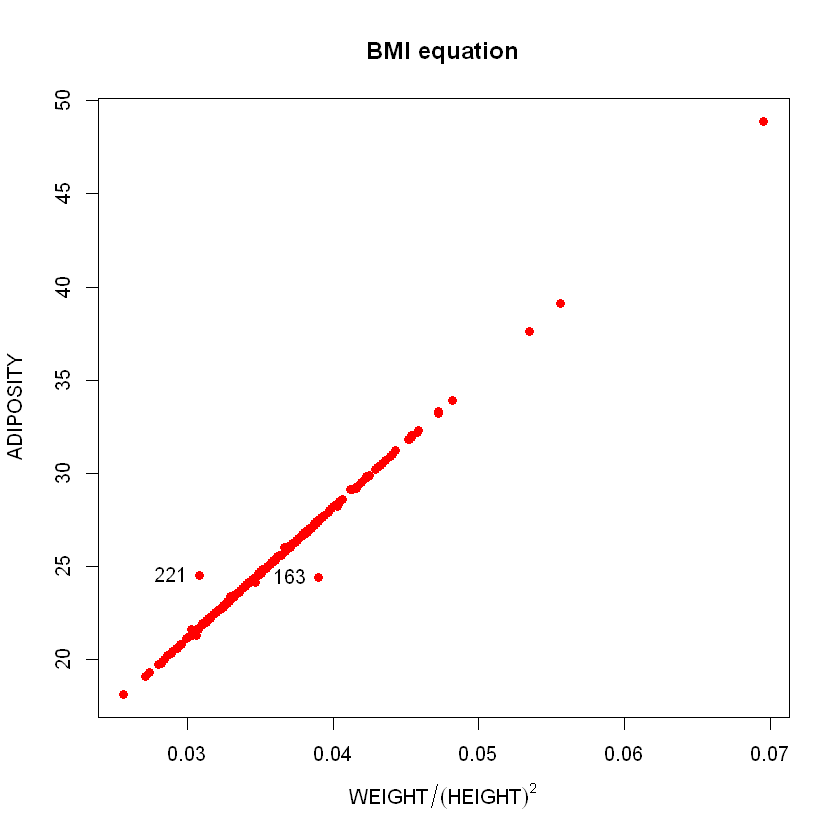

In [22]:
bodyfat$HEIGHT[42]=height
bmi=bodyfat$WEIGHT/(bodyfat$HEIGHT)^2
plot(bodyfat$ADIPOSITY ~ bmi,main="BMI equation",xlab=expression(WEIGHT/(HEIGHT)^2),ylab="ADIPOSITY",pch=19,col="red")
text(bmi[c(163,221)],bodyfat$ADIPOSITY [c(163,221)] ,c(163,221),p=2) #96 182 48 76

#### 221th entry ?????

In [23]:
as.matrix(bodyfat[c(116,123,218,221),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
116,116,16.7,1.0607,40,158.00,69.25,23.4,36.3,97.0,86.6,92.6,55.9,36.3,22.1,29.8,26.3,17.3
123,123,14.8,1.0652,40,160.25,68.75,23.9,36.9,99.3,83.3,97.5,60.5,38.7,22.6,34.4,28.0,17.6
218,218,8.2,1.0819,51,154.50,70.00,22.2,36.9,93.3,81.5,94.4,54.7,39.0,22.6,27.5,25.9,18.6
221,221,12.7,1.0706,54,153.25,70.50,24.5,38.5,99.0,91.8,96.2,57.7,38.1,23.9,31.4,29.9,18.9


For 221 ,the weight and height are similar with the 218. however, their ADIPOSITY differ markedly with each other.
there must be at least one wrong value among these three variables. Since the rest variables of 221 are larger than 218 and on the contradiction , the weight is smaller. 

Hence we assume that the weight of 221 might be wrong

In [24]:
bmi.221=(bodyfat$ADIPOSITY[221]-0.07035)/702.07386
weight=bmi.221*(bodyfat$HEIGHT[221])^2
cat(bodyfat$WEIGHT[221]<-weight)

172.9469

#### 163th entry

In [25]:
as.matrix(bodyfat[c(158,163,167,170),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
158,158,10.5,1.0761,28,182.50,72.25,24.6,37.0,98.5,90.8,102.5,60.8,38.5,25.0,31.6,28.0,18.6
163,163,13.3,1.0690,33,184.25,68.75,24.4,40.7,98.9,92.1,103.5,64.0,37.3,23.5,33.5,30.6,19.7
167,167,21.4,1.0492,35,166.25,68.00,25.3,38.5,99.1,90.4,95.6,55.5,34.2,21.9,30.2,28.7,17.7
170,170,16.5,1.0610,35,172.75,69.50,25.2,37.6,99.1,90.8,98.1,60.1,39.1,23.4,32.5,29.8,17.4


comparing 163 and 167, the value of 163 are larger than 167 with the same height

it is reasonable to say 163 is fatter  than 167 based on the bodyfat and density comparing

but the ADIPOSITY of 163 is smaller

hence we guess there is a mistake when we compute the ADIPOSITY.

What's more weight 163>158,height:163<158,the ADIPOSITY should be 163>158,but the data is not

In [26]:
bmi.163=bodyfat$WEIGHT[163]/(bodyfat$HEIGHT[163])^2
adi=0.1942+698.6151*bmi.163
print(bodyfat$ADIPOSITY[163]<-adi)

[1] 27.42749


#### check the bmi equation again

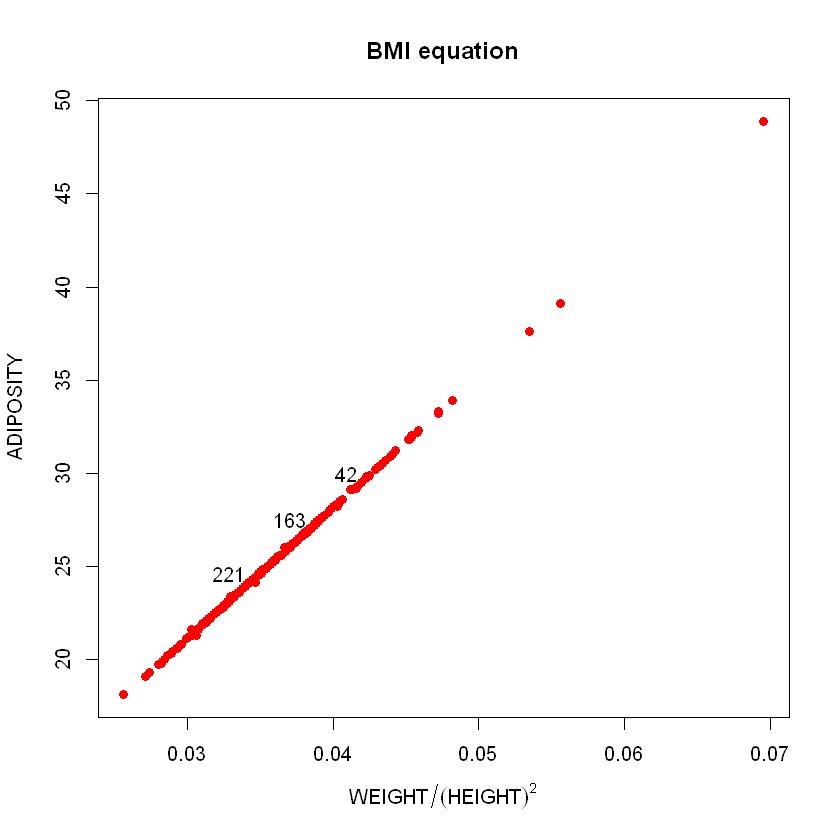

In [27]:
bmi=bodyfat$WEIGHT/(bodyfat$HEIGHT)^2
plot(bodyfat$ADIPOSITY ~ bmi,main="BMI equation",xlab=expression(WEIGHT/(HEIGHT)^2),ylab="ADIPOSITY",pch=19,col="red")
text(bmi[c(42,163,221)],bodyfat$ADIPOSITY[c(42,163,221)]  ,c(42,163,221),p=2) #96 182 48 76

using these two criterion we only need to delet 182,216, other outliers will be replaced by the imputations.

## 1.3  use the Cook's distance to detect outliers

Cook's distance or Cook's D is a commonly used estimate of
the influence of a data point when performing a least-squares regression
analysis
Rule of thumb: classify as leverages anything above 4/(n-p).

Loading required package: carData


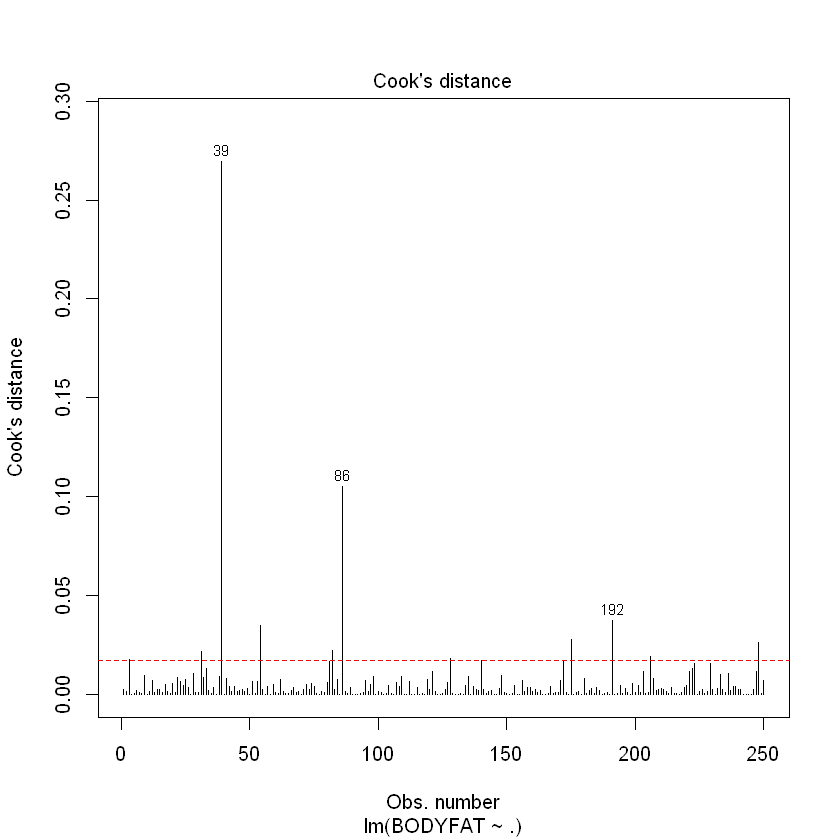

In [28]:
library(car)
model=lm(BODYFAT~ ., data=bodyfat[-c(182,216 ),c(-1,-3)])
plot(model,which = 4)
n=nrow(bodyfat[-c(182,216 ),c(-1,-3)])
p=ncol(bodyfat[-c(182,216 ),c(-1,-3)])
abline(h = 4/(n-p),lty=2,col='red')

#### 39th entry

In [29]:
outlier=as.matrix(bodyfat[39,])
outlier#weight  363.15 pounds

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
39,39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45,29,21.4


since we'd like to find a way to predict the bodyfat for most people

39 as a very influntial point may affect our result and the it's not common

hence we decide to delect 39 and fit model again


Call:
lm(formula = BODYFAT ~ ., data = bodyfat[-c(39, 182, 216), c(-1, 
    -3)])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7194 -2.6709 -0.1562  2.7681  9.0895 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -78.20238   54.33028  -1.439 0.151377    
AGE           0.06242    0.02943   2.121 0.034964 *  
WEIGHT       -0.24493    0.15230  -1.608 0.109128    
HEIGHT        0.93730    0.77486   1.210 0.227637    
ADIPOSITY     1.56723    1.10410   1.419 0.157093    
NECK         -0.35551    0.21559  -1.649 0.100491    
CHEST        -0.11722    0.10351  -1.132 0.258610    
ABDOMEN       0.83615    0.08595   9.728  < 2e-16 ***
HIP          -0.18338    0.13617  -1.347 0.179359    
THIGH         0.18074    0.13740   1.315 0.189662    
KNEE          0.04991    0.22866   0.218 0.827391    
ANKLE         0.12928    0.20416   0.633 0.527200    
BICEPS        0.18204    0.15617   1.166 0.244928    
FOREARM       0.24441    0.19226   1.271 0.204921   

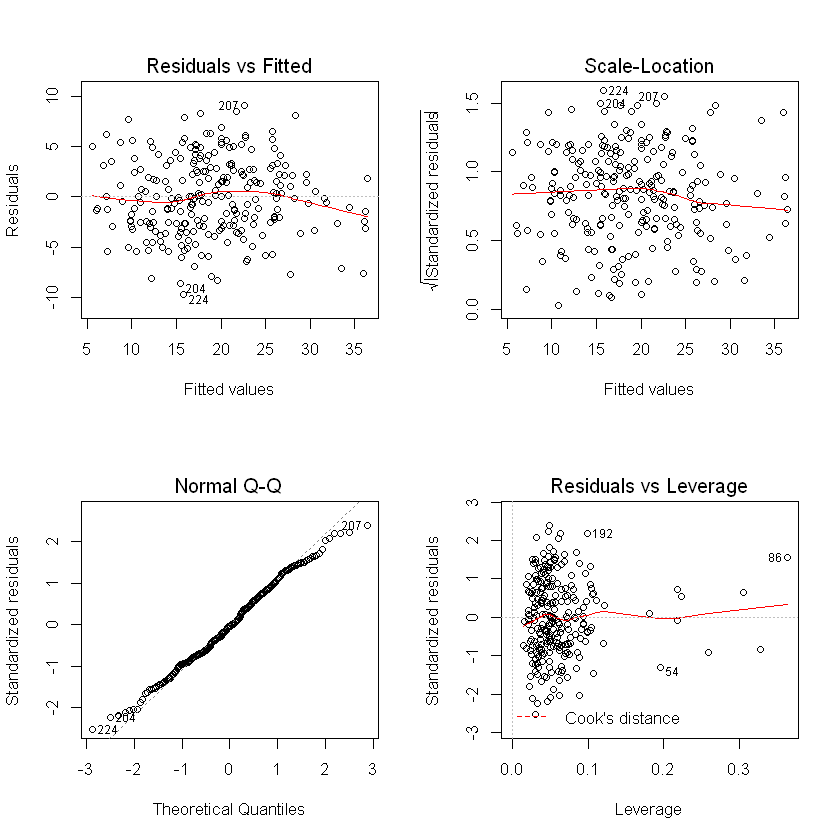

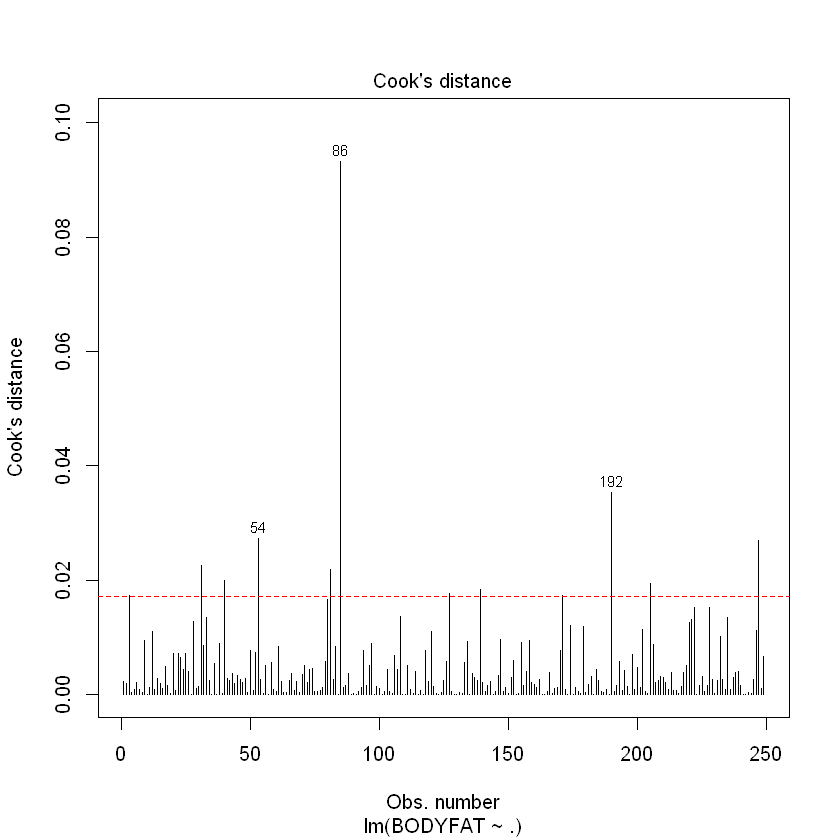

In [30]:
model_2=lm(BODYFAT~ ., data=bodyfat[-c(39,182,216 ),c(-1,-3)])
summary(model_2)
layout(matrix(1:4, ncol=2))
plot(model_2)
layout(matrix(1:1, ncol=1))
plot(model_2,which = 4)
n=n-1#delete 39
abline(h = 4/(n-p),lty=2,col='red')

In [31]:
plot(influencePlot(model_2)1)


ERROR: Error in parse(text = x, srcfile = src): <text>:1:28: unexpected numeric constant
1: plot(influencePlot(model_2)1
                               ^


In [ ]:
outlierTest(model_2)
as.matrix(bodyfat[86,])

#### 86th entry

In [ ]:
model_4=lm(BODYFAT~ ., data=bodyfat[-c(39,86,182,216 ),c(-1,-3)])
summary(model_4)
layout(matrix(1:4, ncol=2))
plot(model_4)
layout(matrix(1:1, ncol=1))
plot(model_4,which = 4)
n=n-1#delete 42
abline(h = 4/(n-p),lty=2,col='red')
influencePlot(model_4)
outlierTest(model_4)

In [ ]:
plot(influencePlot(model_4),which=2)

  # After cleanning data

In [ ]:
bodyfat_new=bodyfat[-c(39,86,182,216),c(-1)]
write.csv(bodyfat_new,"clean dataset.csv")